In [1]:
import scanpy as sc
import pandas as pd
import scrnatools as rna

Global seed set to 0


In [10]:
data = sc.read("/mnt/iacchus/joe/processed_data/M_cell/h5ad_files/combined_WT_fezf2KO_aireKO_all_genes.h5ad")

In [15]:
expression = pd.DataFrame(data.layers["counts"].todense(), index=data.obs.index, columns=data.var_names).T

In [16]:
expression

,AAACCCACAAGACCGA-1,AAACCCACAAGATTGA-1,AAACCCACACGACGAA-1,AAACCCACACTGAATC-1,AAACCCATCCAAGCCG-1,AAACCCATCTATTGTC-1,AAACGAACAAAGGGCT-1,AAACGAACACCCGTAG-1,AAACGAACATGAGATA-1,AAACGAAGTAAGACCG-1,...,TTTGGAGTCACCCTCA-1,TTTGGTTAGCATATGA-1,TTTGGTTCAATTTCTC-1,TTTGGTTGTAGACAGC-1,TTTGGTTGTCGAGATG-1,TTTGTTGAGCTCCCTT-1,TTTGTTGCACTTGACA-1,TTTGTTGCATTCCTAT-1,TTTGTTGGTCTGTTAG-1,TTTGTTGTCTAGCCTC-1
Xkr4,0.0,0.0,0.0,3.0,1.0,8.0,5.0,0.0,20.0,3.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC165294.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC123873.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC126035.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC163611.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
expression.to_hdf("/mnt/iacchus/joe/processed_data/M_cell/thymus_scVI_expression_CYTOtrace.hdf5", key="data")

In [6]:
cell_results = pd.read_csv("analysis/raw_counts_cytoTrace_cell_data.csv", index_col=0)
gene_results = pd.read_csv("analysis/raw_counts_cytoTrace_gene_data.csv", index_col=0)

In [13]:
data.var = data.var.join(gene_results)
data.obs = data.obs.join(cell_results)

In [14]:
data

AnnData object with n_obs × n_vars = 29816 × 28124
    obs: 'batch', 'genotype', 'experiment', 'scrublet_score', 'scrublet_called_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'cell_type', 'CytoTRACE', 'CytoTRACErank', 'GCS', 'Counts'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std', 'cytoGenes', 'gcsGenes'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'leiden', 'leiden_scVI_colors', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts', 'scVI_normalized'
    obsp: 'connectivities', 'distances'

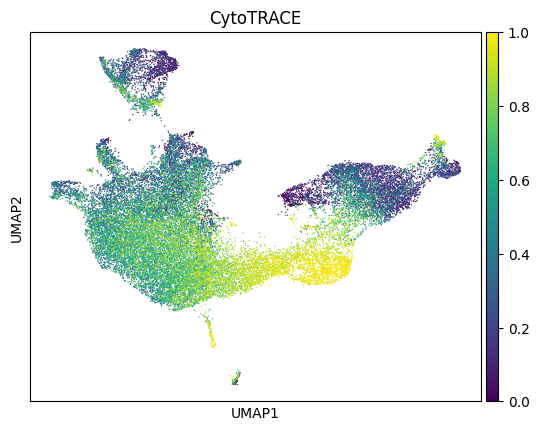

In [23]:
sc.pl.umap(
    data[data.obs.genotype == "WT"],
    color="CytoTRACE",
)

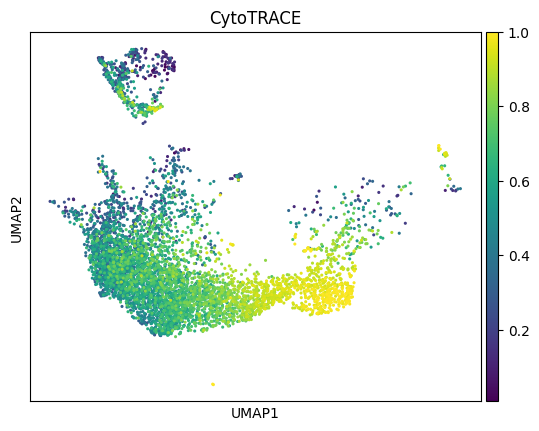

In [35]:
sc.pl.umap(
    data[data.obs.genotype == "Aire_KO"],
    color="CytoTRACE",
)

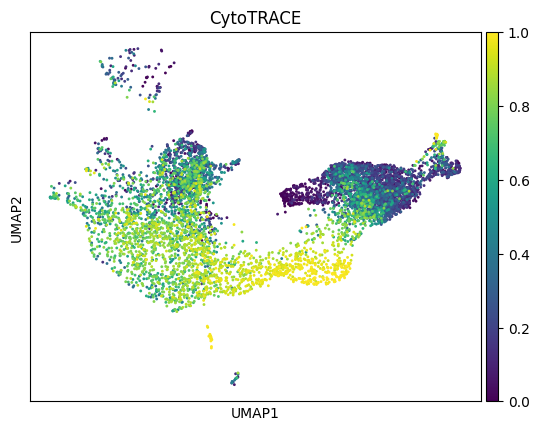

In [36]:
sc.pl.umap(
    data[data.obs.genotype == "Fezf2_KO"],
    color="CytoTRACE",
)

In [25]:
data.var.sort_values(by="cytoGenes", ascending=False).head(100).to_csv("analysis/top_100_cytoTRACE_correlated_genes.csv")

In [33]:
data.var.loc["Mki67", "cytoGenes"]

0.31469711834588

In [34]:
data.var.sort_values(by="cytoGenes", ascending=False).head(50)

,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mean,std,cytoGenes,gcsGenes
Cib1,False,33562,3.708400,38.756592,203224.0,33562,4.157489e-11,0.649542,0.635097,0.585360
Cyba,False,37370,10.223536,31.807814,560260.0,37370,-2.042619e-10,1.009912,0.630358,0.582408
S100a14,False,34635,8.621485,36.798599,472466.0,34635,3.800480e-10,1.051613,0.626538,0.581738
Srgn,False,42751,29.102991,21.988650,1594873.0,42751,1.726974e-11,1.253055,0.621604,0.572853
Rplp2,False,46940,18.799583,14.344629,1030236.0,46940,3.680235e-11,0.696080,0.617435,0.558011
Rpl41,False,50517,33.986149,7.817376,1862475.0,50517,-2.292265e-10,0.551402,0.613004,0.557473
Gapdh,False,38636,6.556030,29.497637,359277.0,38636,-6.559187e-11,0.690538,0.610668,0.554644
Hagh,False,34363,5.677250,37.294940,311119.0,34363,2.949378e-10,0.879437,0.609611,0.548181
Eif5a,False,36145,4.186420,34.043174,229420.0,36145,-1.392892e-11,0.628335,0.609465,0.547779
Atp5e,False,43270,10.036003,21.041587,549983.0,43270,-8.203821e-11,0.588582,0.607166,0.541257
